In [42]:
import pandas as pd

# Load the Data Set
df = pd.read_csv('loan_approval_dataset.csv')

# Show the first columns of the data set
print(df.head())

# Some columns in the data set have spaces that made errors in the code.
df.columns = df.columns.str.strip()

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

## Data Information

### Basic Information
- **Dataset**: The Loan Approval Prediction dataset contains various features of students applying for loans. 
- **Columns**: We will be focusing on the `loan_status` column as our target.

### Summary Statistics

In [43]:
# Show dataset info and describe basic statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None
           loan_id  no_of

In [44]:
# Check for missing values
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

### Encoding Categorical Variables
We will one-hot encode many columns; we will encode the:
- `education`
- `self_employed`
- `loan_status`
features, which are categorical.

In [45]:
# One-hot encode 'education', 'self_employed', and 'loan_status' columns.

df = pd.get_dummies(df, columns=['education', 'self_employed', 'loan_status'], drop_first=True)

# This command changed the 'education', 'self_employed', and 'loan_status' columns to dummies for one-hot encoding. 
# However, if you run this again, it will raise an error because the columns are already replaced by dummies.

# Check the new encoded values
print(df.head())

   loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
0        1                 2       9600000     29900000         12   
1        2                 0       4100000     12200000          8   
2        3                 3       9100000     29700000         20   
3        4                 3       8200000     30700000          8   
4        5                 5       9800000     24200000         20   

   cibil_score  residential_assets_value  commercial_assets_value  \
0          778                   2400000                 17600000   
1          417                   2700000                  2200000   
2          506                   7100000                  4500000   
3          467                  18200000                  3300000   
4          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  education_ Not Graduate  \
0             22700000           8000000                    False   
1              8800000    

### Defining Features and Target
We will define our features `X` and target `y`. The target variable is `loan_status_ rejected`.

In [46]:
# Define the features (X) and target (y)
df.columns = df.columns.str.strip().str.lower()

X = df.drop(['loan_status_ rejected', 'loan_id'], axis=1)
y = df['loan_status_ rejected']

### Data Scaling
We will scale the feature data using `StandardScaler` to normalize the features for better performance in the model.

In [47]:
from sklearn.preprocessing import StandardScaler

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train-Test Split
We will split the dataset into training and test sets (80% training, 20% testing).

In [48]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Training a Logistic Regression Model
We will use the Logistic Regression model to predict the loan approval.

In [49]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
LR_model = LogisticRegression(max_iter=1000)

# Train the model
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Training a Decision Tree Classifier Model
We will use the Decision Tree Classifier model to predict the loan approval.

In [50]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
DTC_model = DecisionTreeClassifier(random_state=42)

# Train the model
DTC_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Model Evaluation
We will evaluate the model using **Accuracy Score**, **Confusion Matrix**, **Roc Auc Score** and **Classifiction Report**. 
We will also plot the predicted vs actual loan status.

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

# Make predictions on the test set

# ----------------------------------------------------------

# For the Logistic Regression Model
LR_Prediction = LR_model.predict(X_test)

# Calculate evaluation metrics
LR_prob = LR_model.predict_proba(X_test)[:, 1]

print('-----Logistic Regression Model-----')
print(f'Accuracy: {accuracy_score(y_test, LR_Prediction)}')
print(f'ROC AUC: {roc_auc_score(y_test, LR_prob)}')
print(f'Classification Report: \n {classification_report(y_test, LR_Prediction)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, LR_Prediction)}')

# ----------------------------------------------------------
print('----------------------------------------')
# ----------------------------------------------------------

# For the Decision Tree Classifier Model
DTC_Prediction = DTC_model.predict(X_test)

# Calculate evaluation metrics
DTC_prob = DTC_model.predict_proba(X_test)[:, 1]

print('-----Decision Tree Classifier Model-----')
print(f'Accuracy: {accuracy_score(y_test, DTC_Prediction)}')
print(f'ROC AUC: {roc_auc_score(y_test, DTC_prob)}')
print(f'Classification Report: \n {classification_report(y_test, DTC_Prediction)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, DTC_Prediction)}')

-----Logistic Regression Model-----
Accuracy: 0.905152224824356
ROC AUC: 0.9674739509997183
Classification Report: 
               precision    recall  f1-score   support

       False       0.92      0.93      0.92       536
        True       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

Confusion Matrix: 
 [[498  38]
 [ 43 275]]
----------------------------------------
-----Decision Tree Classifier Model-----
Accuracy: 0.9742388758782201
ROC AUC: 0.9718037172627428
Classification Report: 
               precision    recall  f1-score   support

       False       0.98      0.98      0.98       536
        True       0.97      0.96      0.97       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

Confusion Matrix: 
 [[

### Visualization
We will plot the **Actual vs Predicted** values to visually inspect how well our model is performing.
There will be 2 graphs, showing the Logistic Regression Model and the Decision Tree Classifier Model respectively.

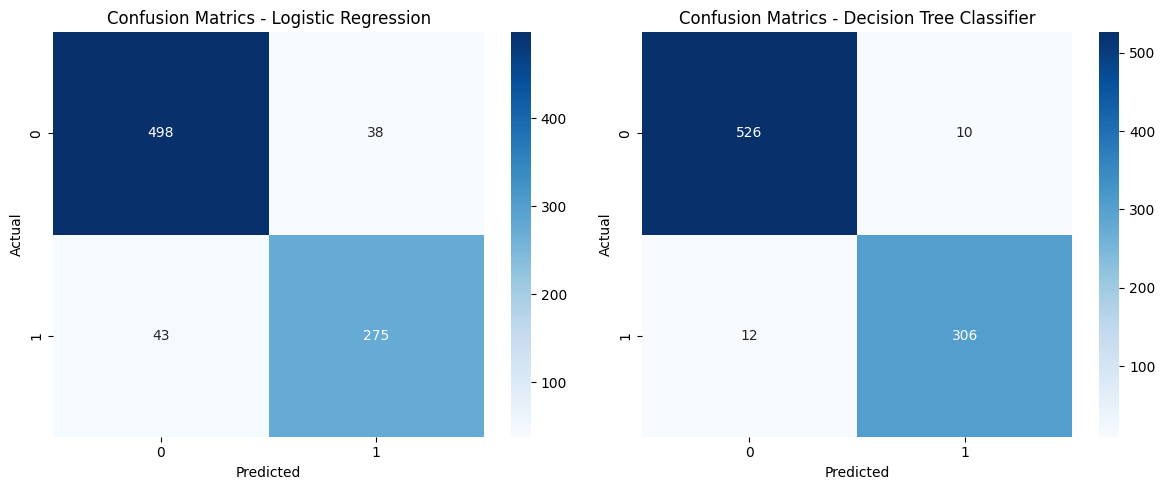

In [52]:
# Plot actual vs predicted values --- For Logistic Regression Model vs Model Tree Classifier
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, pred, title in zip(
    axes,
    [LR_Prediction, DTC_Prediction],
    ['Logistic Regression', 'Decision Tree Classifier']
):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrics - {title}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


### Model Saving
Since the **Decision Tree Classifier** proved to be the best performing model on this dataset, it will be saved to later be deployed through a Flask API.
To make the deployment possible, we will use the **joblib** library to save the model.

In [54]:
import joblib

joblib.dump(DTC_model, 'loan_model.pkl')

['loan_model.pkl']

### User Input
With the following code, the user will be able to introduce it's own values for the model to predict.
To achieve this: 
- Variables for each feature are created and the user fills them with the information it requires. 
- Since the model contain one-hot encoded variables, we manually encode the same values written by the user.
- Those values are saved into a data frame with pandas for the model to able to read those values.

In [ ]:
print('Please Enter the Required Values ')

try:
    no_of_dependents = float(input('No of Dependants (e.g.: 2): '))
    income_annum = float(input('Anual Income (e.g.: 1234567):'))
    loan_amount = float(input('Loan Amount (e.g.: 12345678): '))
    loan_term = float(input('Loan Term (e.g.: 15): '))
    cibil_score = float(input('Credit Score (e.g.: 123): '))
    residential_assets_value = float(input('Asset Value (e.g.: 1234567): '))
    commercial_assets_value = float(input('Commercial Assets Value (e.g.: 1234567): '))
    luxury_asets_value = float(input('Luxury Assets Value (e.g.: 12345678): '))
    bank_asset_value = float(input('Bank Asset Value (e.g.: 1234567): '))

    # Categorical Values
    education = input("Education (Graduate/Not Graduate): ").strip()
    self_employed = input("Self Employed (Yes/No): ").strip()

    # Creation of the dataframe with the user values
    user_data = pd.DataFrame([[no_of_dependents, income_annum,
        loan_amount, loan_term, cibil_score,
        residential_assets_value, commercial_assets_value,
        luxury_asets_value, bank_asset_value, 
        0 if education.lower() == 'graduate' else 1, 
        1 if self_employed.lower() == 'yes' else 0
        ]],
        columns=[
        'no_of_dependents',
        'income_annum',
        'loan_amount',
        'loan_term',
        'cibil_score',
        'residential_assets_value',
        'commercial_assets_value',
        'luxury_assets_value',
        'bank_asset_value',
        'education_ not graduate',
        'self_employed_ yes'
    ])

    user_data_scaled = scaler.transform(user_data)

    # Prediction
    prediction = DTC_model.predict(user_data_scaled)

    # Result
    print('Prediction Result:', 'Approved ✅' if prediction[0] == 0 else 'Rejected ❌')
except ValueError:
    print('Please enter the values as specified...')
except Exception as e:
    print(f'An error occured :( {e})')


Please Enter the Following Values: 
Please enter the values as specified
